In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind

In [2]:
# Options Pandas
pd.set_option('display.max_row', 30)
pd.set_option('display.max_column', 30)

In [3]:
data = pd.read_csv('data/training.csv')
data.head()

,class,max_ndvi,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,20150125_N,20150109_N,20141117_N,20141101_N,20141016_N,20140930_N,20140813_N,20140626_N,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,water,997.904,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,-1628.240,-1325.64,-944.084,277.107,-206.7990,536.441,749.348,-482.993,492.001,655.770,-921.193,-1043.160,-1942.490,267.138,366.608,452.238,211.328,-2203.02,-1180.190,433.906
1,water,914.198,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,-1670.590,-1408.64,-989.285,214.200,-75.5979,893.439,401.281,-389.933,394.053,666.603,-954.719,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.00,-1360.560,524.075
2,water,3800.810,1671.3400,1206.880,449.735,1071.21,546.371,1077.840,214.564,849.599,1283.63,1304.910,542.100,922.6190,889.774,836.292,1824.160,1670.270,2307.220,1562.210,1566.160,2208.440,1056.600,385.203,300.560,293.730,2762.57,150.931,3800.810
3,water,952.178,58.0174,-1599.160,210.714,-1052.63,578.807,-1564.630,-858.390,729.790,-3162.14,-1521.680,433.396,228.1530,555.359,530.936,952.178,-1074.760,545.761,-1025.880,368.622,-1786.950,-1227.800,304.621,291.336,369.214,-2202.12,600.359,-1343.550
4,water,1232.120,72.5180,-1220.880,380.436,-1256.93,515.805,-1413.180,-802.942,683.254,-2829.40,-1267.540,461.025,317.5210,404.898,563.716,1232.120,-117.779,682.559,-1813.950,155.624,-1189.710,-924.073,432.150,282.833,298.320,-2197.36,626.379,-826.727


# Analyse du jeu de données
- ## Analyse de Forme:
    - **Variable target**: class
    - **Lignes et colonnes**: (10545, 29)
    - **Type des variables**: 28 quantitatives (float64) et 1 qualitative (object)
    - **Analyse de valeurs manquantes**: aucune NA

- ## Analyse de Fond:
    - **Visualisation de la variable target**: 
        - 70% des valeurs sont classées comme Forest et on a très peu de données d'autres classes
    - **Signification des variables**: 
        - variables qui représentent les jours semblent non standardisées et avec beaucoup de bruit
        - le max_ndvi est asymétrique
    - **Relation Variables/Target**:
        - Hypothèse: les classes sont centrées autour différents valeurs ndvi, car ce sont différents types de végétation/sol
        - Nous avons remarqué que certains jours, certaines ou toutes les classes sont centrées autour d'un point proche de zéro ou proche de 8000 ndvi (Voir jours 20140218_N et 20150109_N, par example). Intéressante vérifier l'influence de bruit.
        - Le **max_ndvi** peut être utilisée pour identifier les classes. D'après la définition du ndvi on voir que les nuages baissent les valeurs de ndvi, alors on peut penser, que dans bonnes conditions atmosphériques, le max_ndvi représentent le vrai valeur de ndvi de la région en question. Cela, semble raisonnable, car d'après la distribution des max_ndvi par classe, on voir forest, grass, farm et orchard, qui sont des végétations avec trop de vert, proche de 8000 (valeurs haut). De plus, water et impervious sont en bas autour de 2000, ce qui est bien d'accord avec la définition du ndvi.(Voir pour plus de détails sur le ndvi https://en.wikipedia.org/wiki/Normalized_difference_vegetation_index)
            - Aussi, on peut penser à créer un groupe végétation avec (forest, grass, farm et orchard) pour étudier comment séparer ces classes

- ## Analyse détaillée
    - ### Relation Variables/Variables:
        - Tous/tous: On remarque qu'il n'y a pas de variables fortement corrélées, mais il y en a quelques avec une corrélation supérieure à 0,5
        - max_ndvi/tous: 
            - On remarque que le jour 20140202_N est linéairement fortement corrélé et il y en a d'autres qui sont moins corrélées, mais autour de 0,5
            
            
- ## Hypothèses nulle(H0):
    - ### Les individus ont une moyenne de max_ndvi significativement différents
        - H0 = Les moyens de max_ndvi sont égaux chez les individus de tous les classes
   

# Conclusions initiales

- ## Hypothèses
    - On rejette l'hyothèse nulle sauf pour les classes water et impervious, donc ces classes n'ont pas des moyens de max_ndvi significativement différents
  

In [4]:
# Analyse de Forme
df = data.copy()

In [5]:
df.shape

(10545, 29)

In [6]:
df.dtypes.value_counts()

float64    28
object      1
dtype: int64

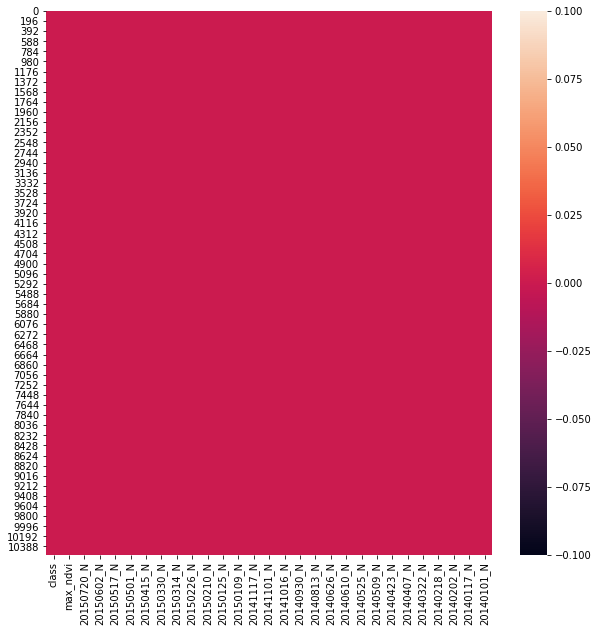

In [7]:
# Valeurs NA
plt.figure(figsize=(10,10))
sns.heatmap(df.isna(), cbar=True)

forest        0.704694
farm          0.136652
impervious    0.091892
grass         0.042295
water         0.019440
orchard       0.005026
Name: class, dtype: float64


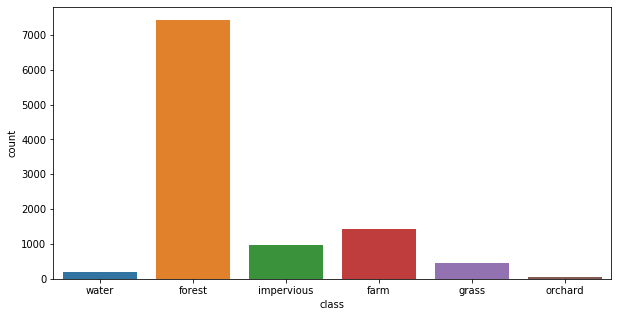

In [8]:
# Analyse target:
classDist = df['class'].value_counts(normalize=True)
print(classDist)

plt.figure(figsize=(10,5))
sns.countplot(df['class'])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matp

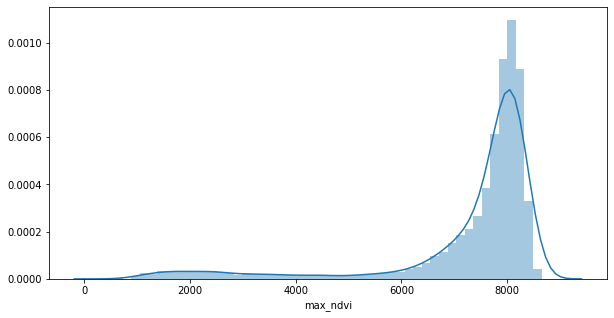

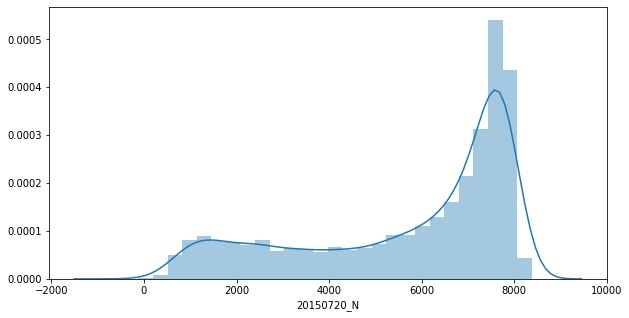

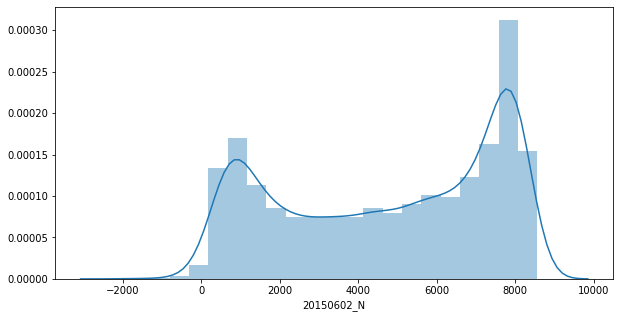

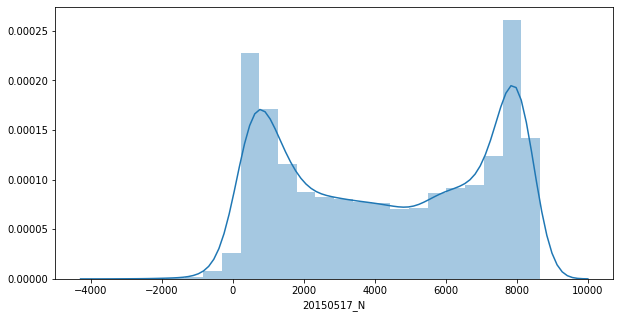

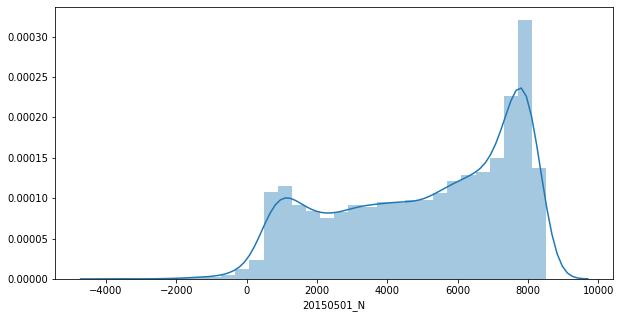

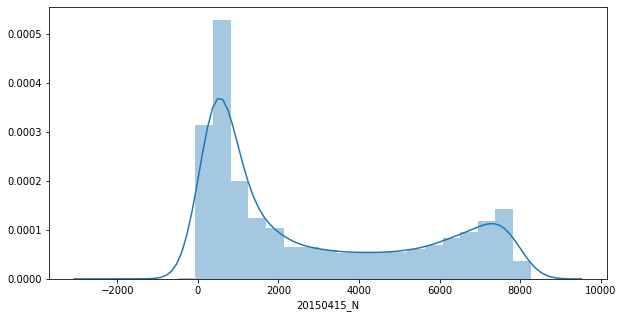

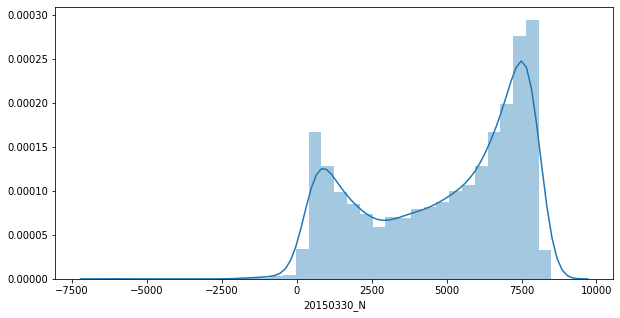

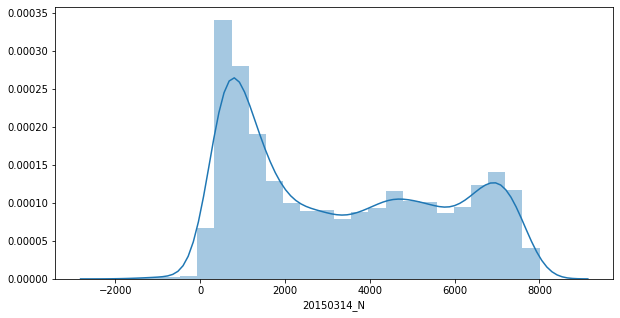

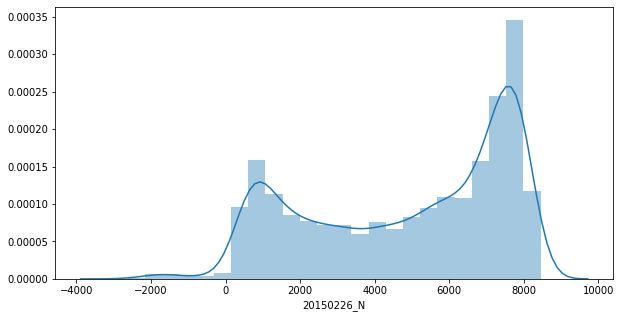

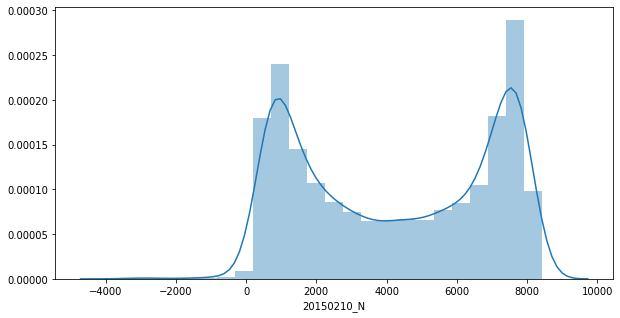

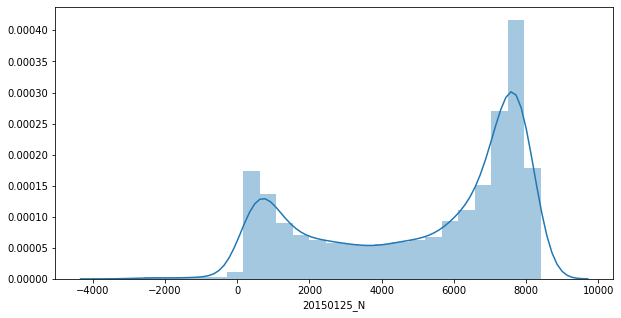

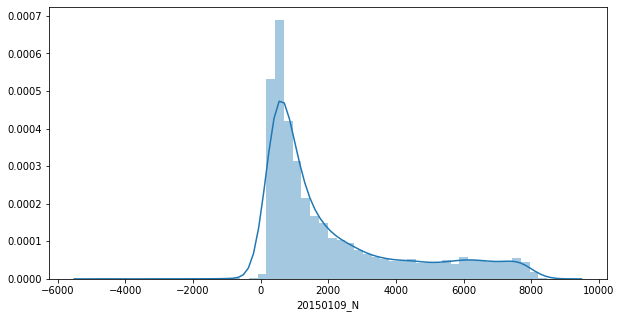

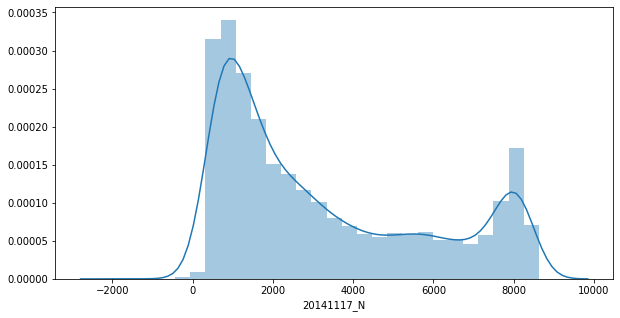

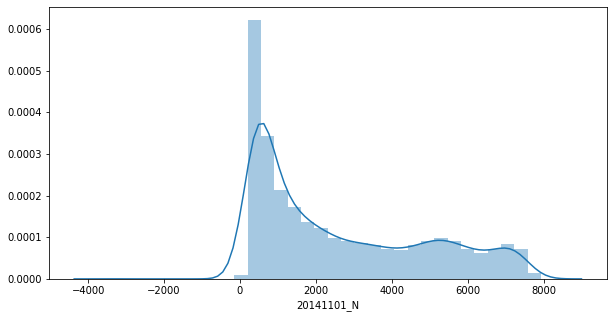

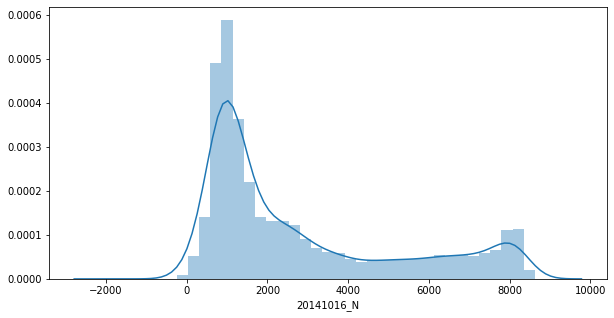

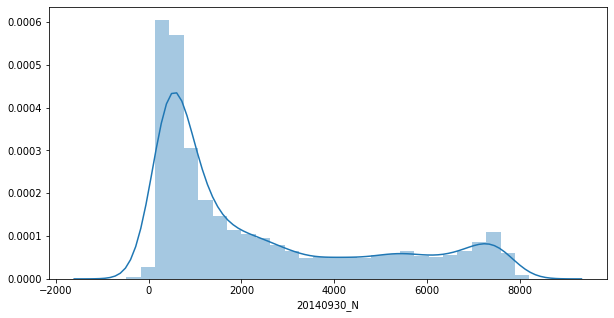

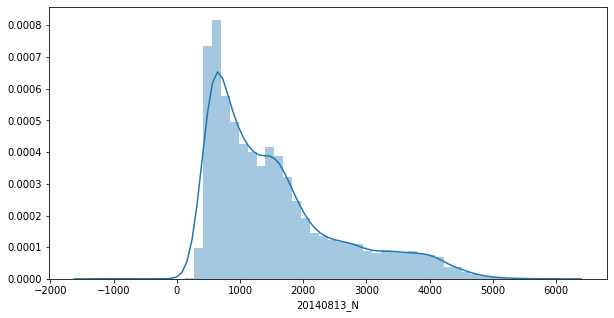

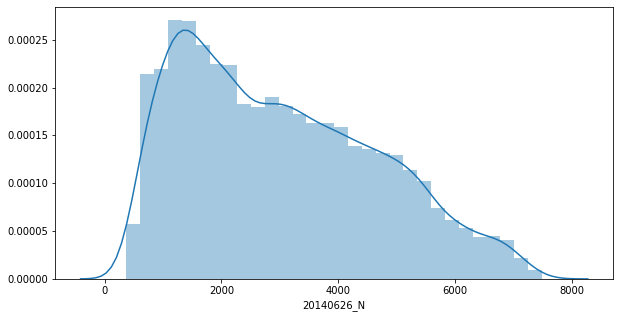

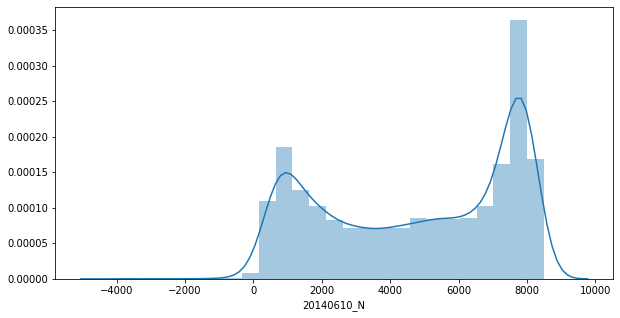

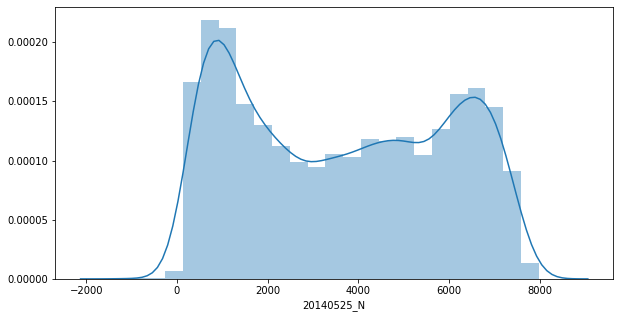

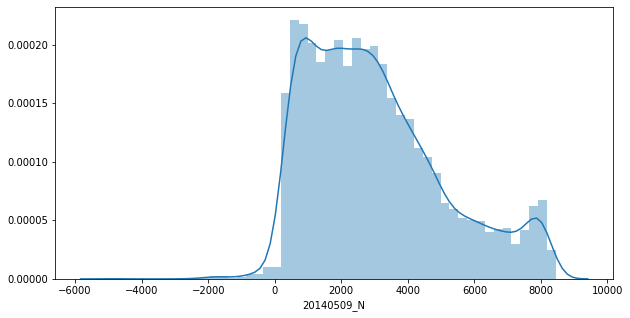

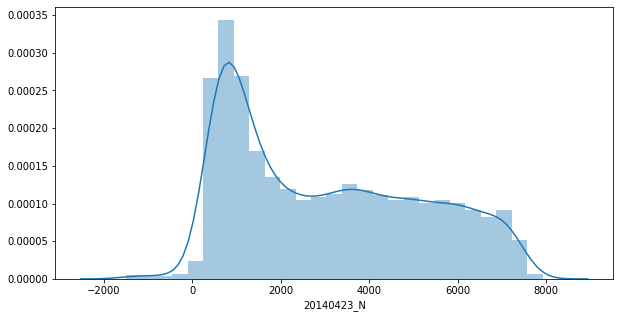

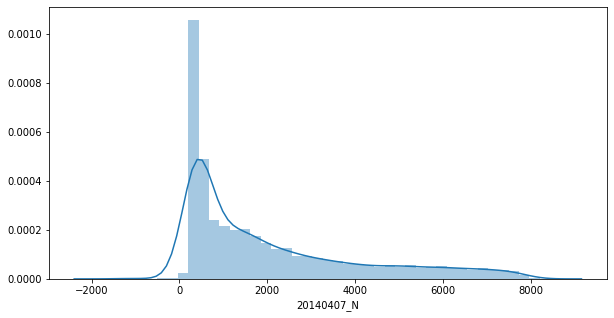

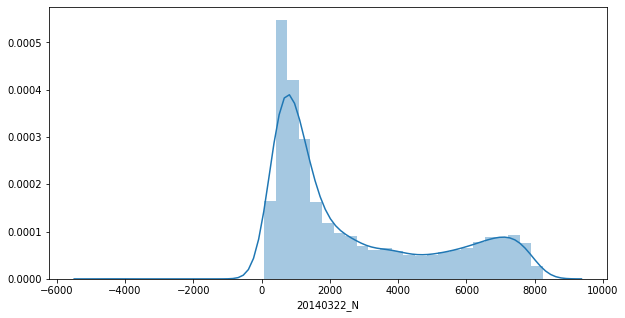

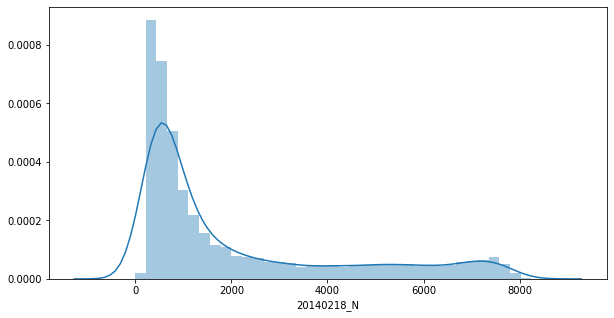

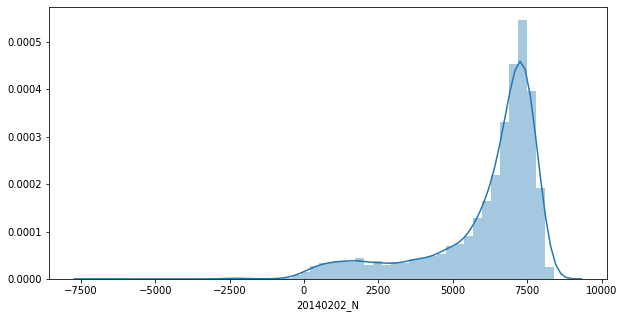

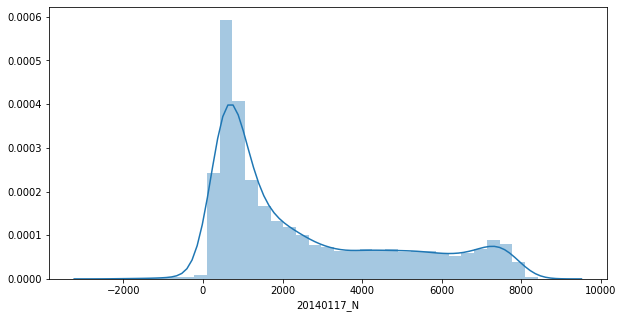

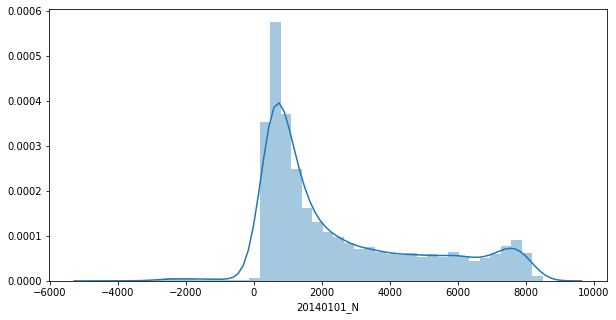

In [56]:
# Histogramme des variables continues
for col in df.select_dtypes('float64'):
    plt.figure(figsize=(10,5))
    sns.distplot(df[col])

In [10]:
# Relation Target/Variables
# Séparation des classes et création de sous-ensembles
df_forest = df[df['class'] == 'forest']
df_water = df[df['class'] == 'water']
df_imp = df[df['class'] == 'impervious']
df_farm = df[df['class'] == 'farm']
df_grass = df[df['class'] == 'grass']
df_orch = df[df['class'] == 'orchard']
df_veg = df[df['class'].isin(['forest', 'farm', 'orchard', 'grass'])]

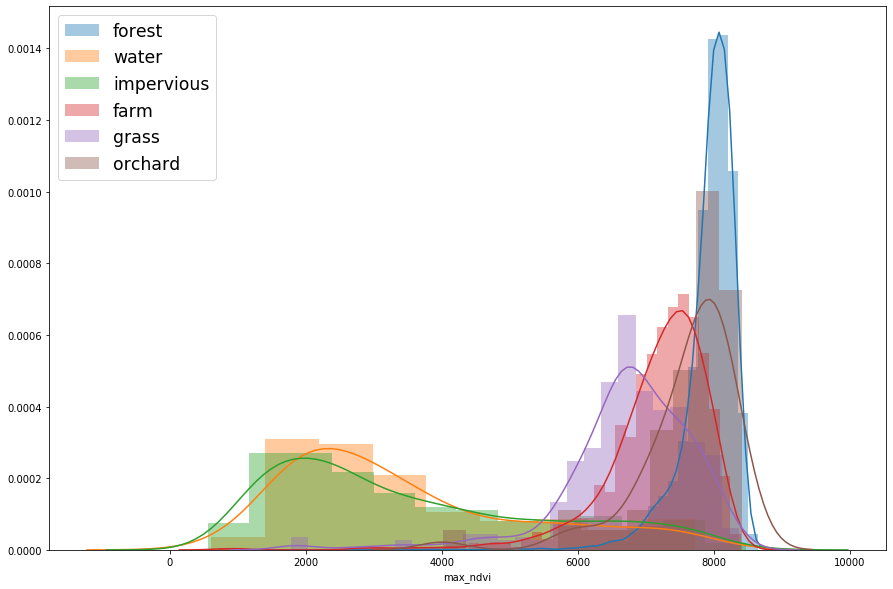

In [14]:
# Target/Variables
for col in df.columns[1:]:
    plt.figure(figsize=(15,10))
    sns.distplot(df_forest[col], label='forest')
    sns.distplot(df_water[col], label='water')
    sns.distplot(df_imp[col], label='impervious')
    sns.distplot(df_farm[col], label='farm')
    sns.distplot(df_grass[col], label='grass')
    sns.distplot(df_orch[col], label='orchard')
    plt.legend(loc='best', fontsize='xx-large')
    break

<Figure size 720x720 with 0 Axes>

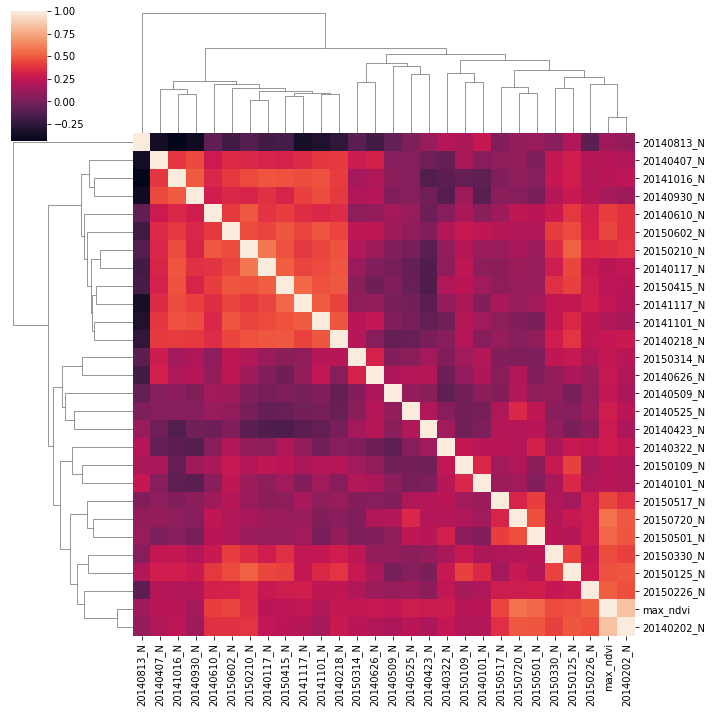

In [105]:
# Analyse détaillée
plt.figure(figsize=(10,10))
sns.clustermap(df[df.columns[1:]].corr())
plt.show()

/home/gabe/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/home/gabe/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/home/gabe/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until exp

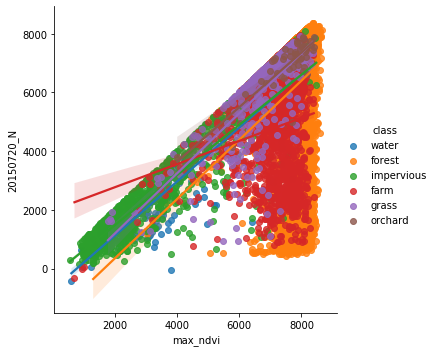

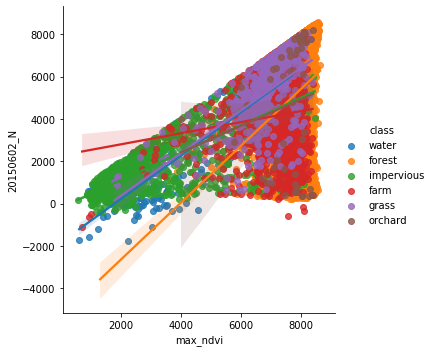

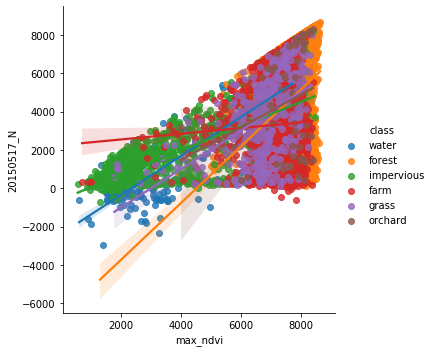

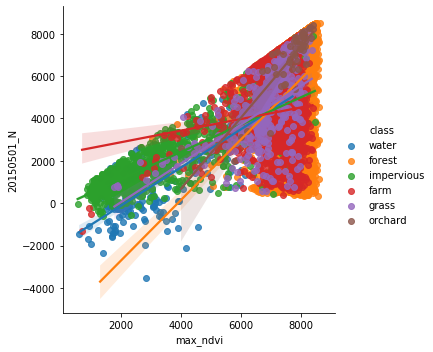

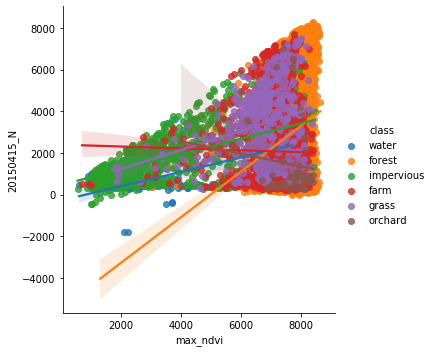

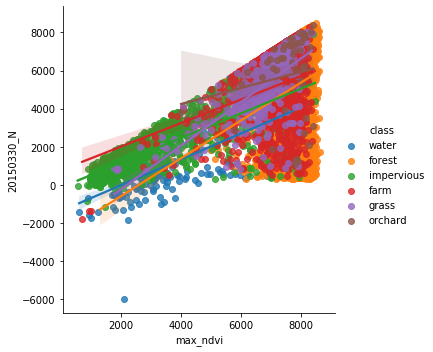

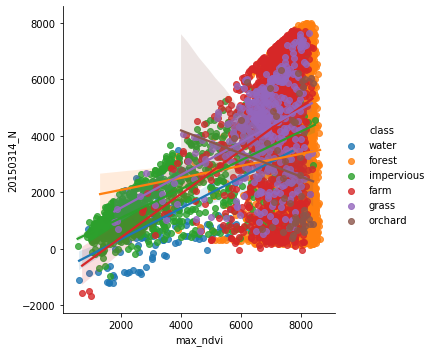

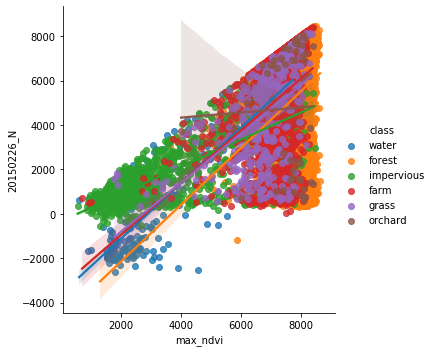

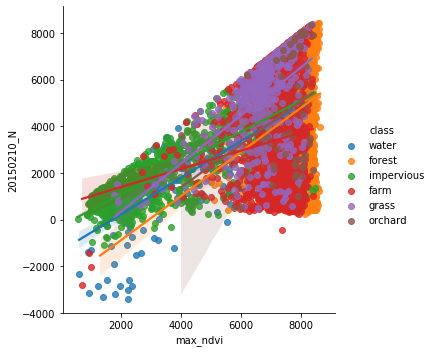

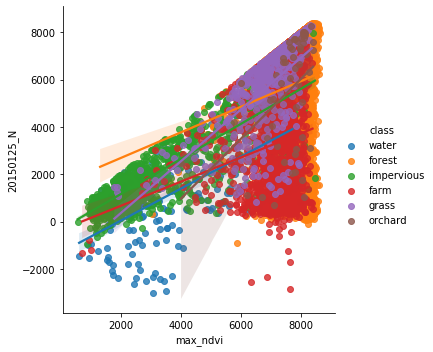

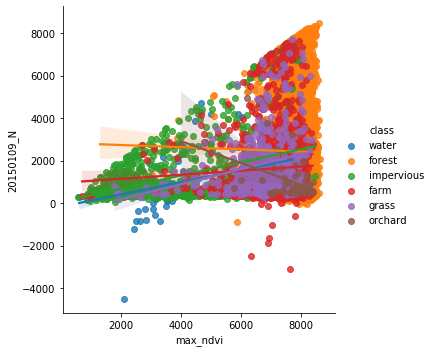

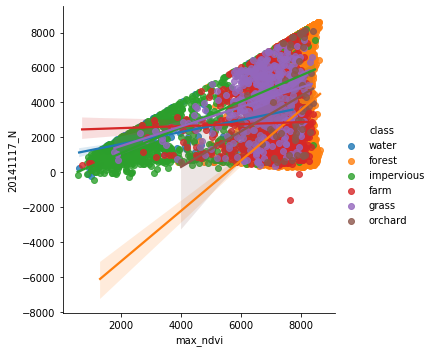

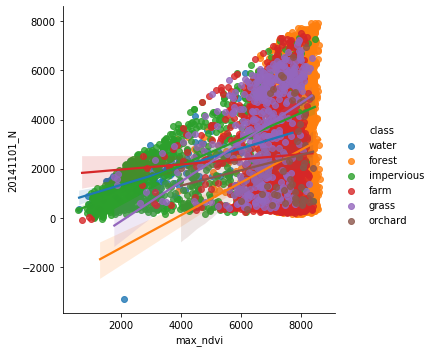

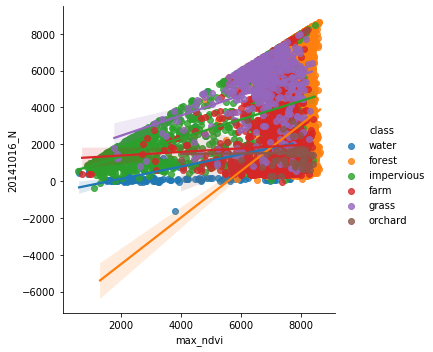

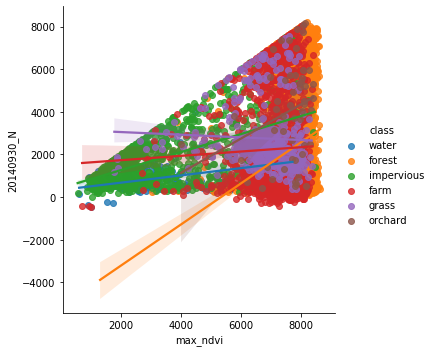

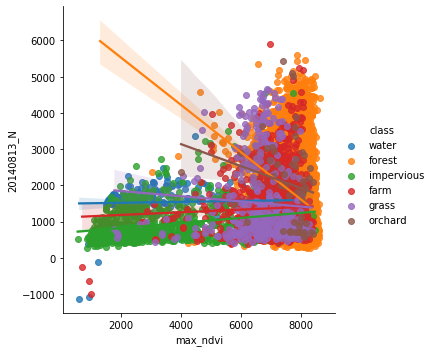

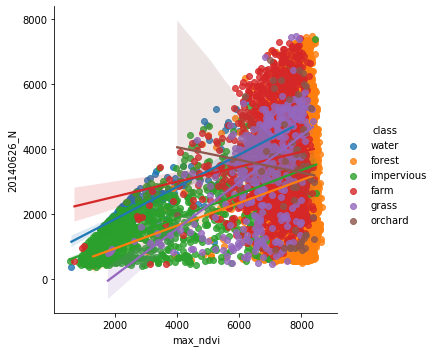

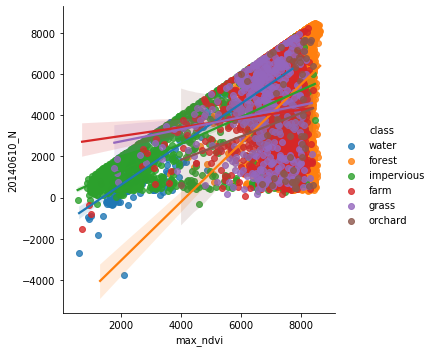

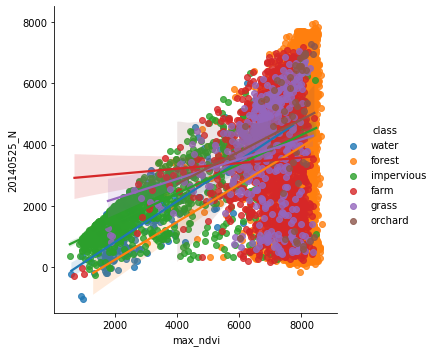

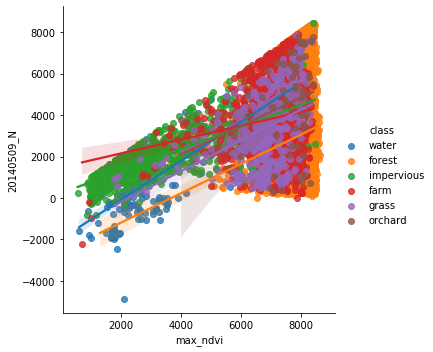

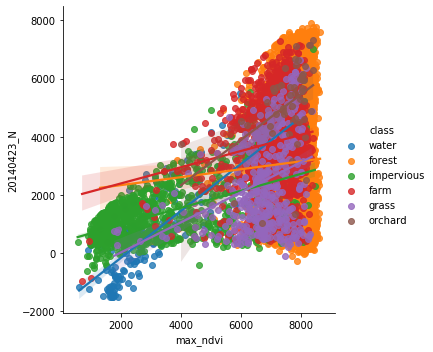

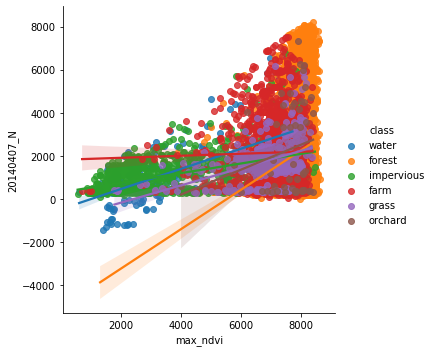

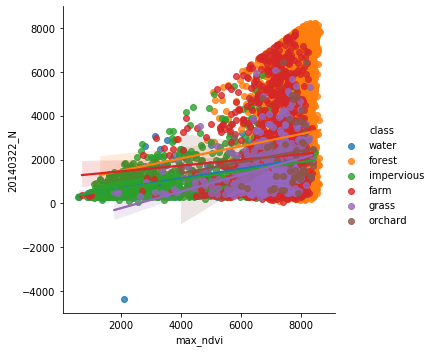

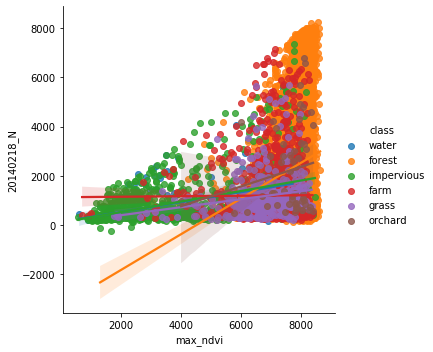

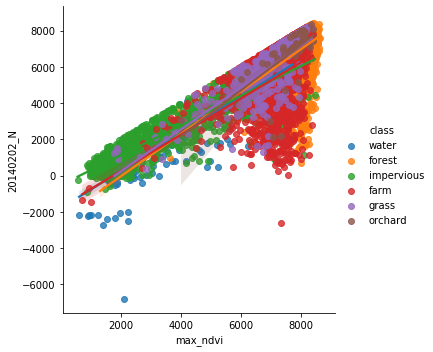

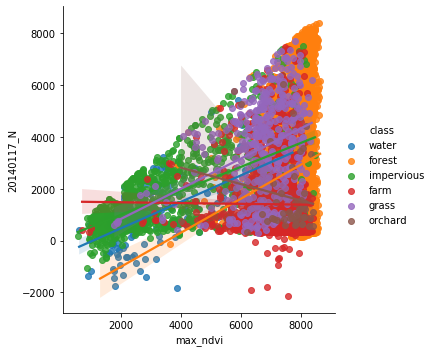

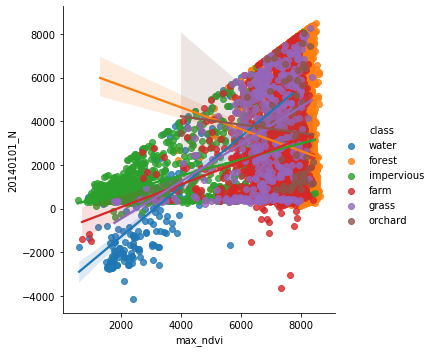

In [108]:
# max_ndvi/variables
for col in df.columns[2:]:
    sns.lmplot(x="max_ndvi", y=col, hue="class", data=df)

In [109]:
df.corr()['max_ndvi'].sort_values()

20140813_N    0.130187
20140930_N    0.158774
20141101_N    0.184436
20150109_N    0.211471
20141016_N    0.213040
20140101_N    0.216677
20140407_N    0.219089
20140117_N    0.223765
20150415_N    0.229725
20141117_N    0.244041
20140509_N    0.248299
20150314_N    0.250101
20140218_N    0.259365
20140626_N    0.270246
20140423_N    0.281613
20140322_N    0.285901
20140525_N    0.292086
20150210_N    0.370539
20140610_N    0.422561
20150602_N    0.440258
20150517_N    0.444904
20150330_N    0.462855
20150125_N    0.477365
20150226_N    0.515929
20150501_N    0.543092
20150720_N    0.578107
20140202_N    0.844788
max_ndvi      1.000000
Name: max_ndvi, dtype: float64

# Test de Student

In [132]:
# Les groupes ne sont pas équilibrées
print(df_forest.shape)
print(df_grass.shape)
print(df_farm.shape)
print(df_orch.shape)
print(df_water.shape)
print(df_imp.shape)

(7431, 29)
(446, 29)
(1441, 29)
(53, 29)
(205, 29)
(969, 29)


In [143]:
# Échantillonnage
# On va essayer avec 53, mais il faut vérfier si c'est suffisant (TODO)
samples = 53
bal_forest = df_forest.sample(samples)
bal_grass = df_grass.sample(samples)
bal_farm = df_farm.sample(samples)
bal_water = df_water.sample(samples)
bal_imp = df_imp.sample(samples)

jeus = [bal_farm, bal_forest, bal_grass, bal_imp, bal_water, df_orch]

In [144]:
def t_test(df_a, df_b):
    alpha=0.02
    stat, p = ttest_ind(df_a, df_b)
    if p < alpha:
        return 'H0 Rejetée'
    else:
        return 0

In [157]:
# TODO: ameliorer ça
for jeu in jeus:
    for j in jeus:
        print (jeu['class'].unique(), j['class'].unique())
        print(t_test(jeu['max_ndvi'], j['max_ndvi']))

['farm'] ['farm']
0
['farm'] ['forest']
H0 Rejetée
['farm'] ['grass']
H0 Rejetée
['farm'] ['impervious']
H0 Rejetée
['farm'] ['water']
H0 Rejetée
['farm'] ['orchard']
H0 Rejetée
['forest'] ['farm']
H0 Rejetée
['forest'] ['forest']
0
['forest'] ['grass']
H0 Rejetée
['forest'] ['impervious']
H0 Rejetée
['forest'] ['water']
H0 Rejetée
['forest'] ['orchard']
H0 Rejetée
['grass'] ['farm']
H0 Rejetée
['grass'] ['forest']
H0 Rejetée
['grass'] ['grass']
0
['grass'] ['impervious']
H0 Rejetée
['grass'] ['water']
H0 Rejetée
['grass'] ['orchard']
H0 Rejetée
['impervious'] ['farm']
H0 Rejetée
['impervious'] ['forest']
H0 Rejetée
['impervious'] ['grass']
H0 Rejetée
['impervious'] ['impervious']
0
['impervious'] ['water']
0
['impervious'] ['orchard']
H0 Rejetée
['water'] ['farm']
H0 Rejetée
['water'] ['forest']
H0 Rejetée
['water'] ['grass']
H0 Rejetée
['water'] ['impervious']
0
['water'] ['water']
0
['water'] ['orchard']
H0 Rejetée
['orchard'] ['farm']
H0 Rejetée
['orchard'] ['forest']
H0 Rejetée
['